In [2]:
#XDataDump - will not run in Python 3
from time import time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

start_time = time()

import subprocess
import os
from urllib import quote_plus as urlquote

proxy = "garimaj[an_rt_ws04]/Learning123@exa_usmacprdh_an"

cmd_str =   "xdatadump userid='" + str(proxy) \
                + "' sqlstmt='select * from GJ_SHIS_EST_TIME3" \
                +  "' delimiter=^ header=y > time_bw_pur.csv"        

print(cmd_str)
subprocess.call(cmd_str, cwd='./', shell=True)

end_time = time()
time_taken = end_time - start_time # time_taken is in seconds
minutes, seconds = divmod(time_taken, 60)
print("Import took %d minutes and %d seconds" %(minutes, seconds) )

tdata = pd.read_csv('time_bw_pur.csv',header=0, delimiter="^")
tdata.head()

xdatadump userid='garimaj[an_rt_ws04]/Learning123@exa_usmacprdh_an' sqlstmt='select * from GJ_SHIS_EST_TIME3' delimiter=^ header=y > time_bw_pur.csv
Import took 0 minutes and 9 seconds


,FLAG,PRSN_ID,P1,P2,P3,P4,P5,DIFF21,DIFF32,DIFF43,DIFF54
0,j1,192436693,2007-09-26 00:00:00,2007-11-24 00:00:00,2008-03-21 00:00:00,2008-03-25 00:00:00,2009-05-09 00:00:00,59,118.0,4.0,410.0
1,j1,273242847,2010-05-01 00:00:00,2011-04-21 00:00:00,2012-08-31 00:00:00,2012-10-17 00:00:00,2013-04-26 00:00:00,355,498.0,47.0,191.0
2,j1,1699812483,2014-04-15 00:00:00,2014-04-17 00:00:00,2014-04-25 00:00:00,2014-06-05 00:00:00,2014-10-21 00:00:00,2,8.0,41.0,138.0
3,j2,162243913,2009-12-22 00:00:00,2014-07-27 00:00:00,2014-08-12 00:00:00,2015-07-04 00:00:00,2015-09-03 00:00:00,1678,16.0,326.0,61.0
4,j2,276719059,2014-09-09 00:00:00,2015-03-04 00:00:00,2015-06-08 00:00:00,2015-09-28 00:00:00,2015-10-07 00:00:00,176,96.0,112.0,9.0


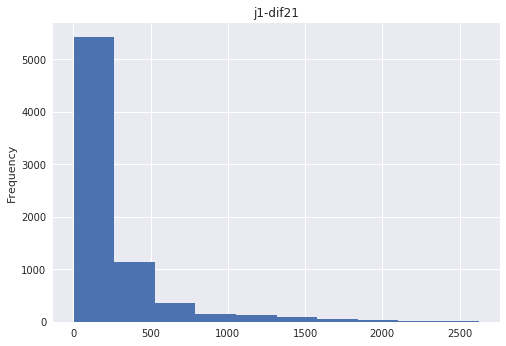

In [11]:
tdata.ix[tdata.FLAG=='j1',7].plot(kind='hist', title='j1-dif21')

In [19]:
tdata.ix[tdata.FLAG=='j1',7].max()

2629

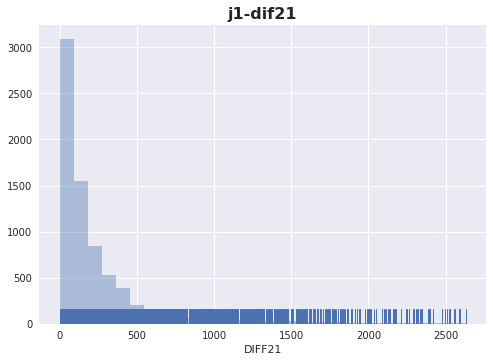

In [20]:
#Quarterly
sns.distplot(tdata.ix[tdata.FLAG=='j1',7], bins=29, kde=False, rug=True)  # bins 7 means 2629/7= 378 days: 29 bins> quarter: 88>mn

plt.title("j1-dif21", fontsize=16, fontweight='bold')

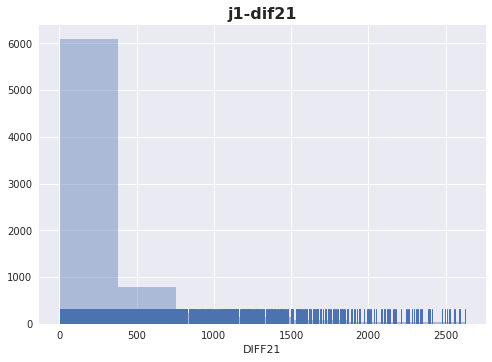

In [21]:
#Yearly
sns.distplot(tdata.ix[tdata.FLAG=='j1',7], bins=7, kde=False, rug=True)  # bins 7 means 2629/7= 378 days: 29 bins> quarter

plt.title("j1-dif21", fontsize=16, fontweight='bold')

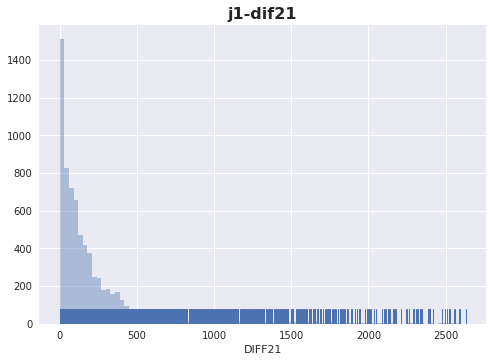

In [22]:
#Monthly
sns.distplot(tdata.ix[tdata.FLAG=='j1',7], bins=88, kde=False, rug=True)  # bins 7 means 2629/7= 378 days: 29 bins> quarter

plt.title("j1-dif21", fontsize=16, fontweight='bold')

In [31]:
tdata.ix[tdata.FLAG=='j1',2:].describe().transpose()

#max time taken for 2nd visit and then the gap reduces!

,count,mean,std,min,25%,50%,75%,max
DIFF21,7406.0,241.072239,350.817546,1.0,43.0,120.0,282.00,2629.0
DIFF32,7403.0,185.096718,251.667245,1.0,41.0,107.0,224.00,2629.0
DIFF43,7356.0,159.059679,204.320134,1.0,36.0,97.0,196.25,2479.0
DIFF54,7220.0,150.095568,193.986435,1.0,35.0,93.0,188.00,2379.0


In [32]:
tdata.ix[tdata.FLAG=='j2',2:].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DIFF21,18191.0,245.491892,349.753551,1.0,49.0,126.0,287.0,2722.0
DIFF32,18191.0,190.768017,260.398256,1.0,45.0,110.0,223.0,2642.0
DIFF43,18094.0,163.317730,206.998207,1.0,43.0,104.0,198.0,2380.0
DIFF54,17811.0,148.501825,176.706350,1.0,42.0,98.0,188.0,2091.0


In [33]:
tdata.ix[tdata.FLAG=='j3',2:].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DIFF21,7627.0,225.643897,341.604625,1.0,37.0,105.0,256.0,2728.0
DIFF32,7627.0,171.128229,245.417181,1.0,35.0,91.0,204.0,2393.0
DIFF43,7593.0,147.273146,205.412089,1.0,30.0,84.0,182.0,2260.0
DIFF54,7506.0,135.933786,185.061363,1.0,30.0,80.0,168.0,2417.0


In [34]:
tdata.ix[tdata.FLAG=='j4',2:].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DIFF21,8680.0,245.319585,343.082866,1.0,50.0,124.0,295.0,2766.0
DIFF32,8680.0,192.500576,261.176969,1.0,47.0,109.0,231.0,2587.0
DIFF43,8622.0,163.957087,213.338785,1.0,42.0,99.0,200.0,2339.0
DIFF54,8496.0,151.343809,189.863857,1.0,41.0,95.0,189.0,2139.0


In [35]:
tdata.ix[tdata.FLAG=='j5',2:].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DIFF21,3444.0,196.976771,289.321191,1.0,42.0,103.0,222.0,2552.0
DIFF32,3444.0,175.072880,261.346825,1.0,37.0,93.0,198.0,2650.0
DIFF43,3437.0,159.352924,224.375551,1.0,40.0,90.0,185.0,2327.0
DIFF54,3420.0,145.716667,202.042819,1.0,37.0,87.0,177.0,2438.0
